<a href="https://colab.research.google.com/github/Vanshika2506/Yulu/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red" face='georgia'> Business Problem

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#<font color="red" face='georgia'>Column Profiling

--datetime: datetime

--season: season (1: spring, 2: summer, 3: fall, 4: winter)

--holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

--workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

 1:  Clear, Few clouds, partly cloudy, partly cloudy

 2:  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 3:  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 4:  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

--temp: temperature in Celsius

--atemp: feeling temperature in Celsius

--humidity: humidity

--windspeed: wind speed

--casual: count of casual users

--registered: count of registered users

--count: count of total rental bikes including both casual and registered

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [78]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


##<font color="red" face='georgia'>Checking the Structure & Characteristics of the dataset</font>

In [6]:
# Checking the number of rows and columns in the data
df.shape

(10886, 12)

In [7]:
# Checking Data types of each column
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
# Checking additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Checking Stats of the data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [79]:
#Extracting date from datetime column
df["datetime"]=pd.to_datetime(df["datetime"])
df["Year"]=df["datetime"].dt.year
df["Month"]=df["datetime"].dt.month
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


In [11]:
# Checking Null values in the data
df.isnull().sum().sum()

0

<font color='blue'>Hence, The Data has no null values.

In [12]:
#Checking for Duplicates
df.duplicated().sum()

0

<font color='blue'>Hence, The Data has no duplicate values.

In [13]:
#Checking number of registered users
df["registered"].nunique()

731

##<font color="red" face="georgia">Analyzing the distribution of Numerical variables

<ipython-input-14-1556b237e3f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["temp"])


<Axes: ylabel='Density'>

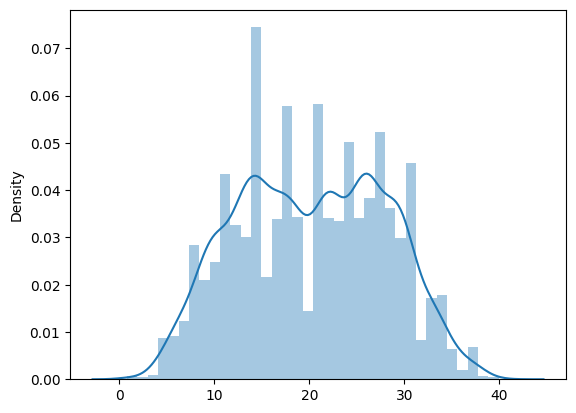

In [14]:
#checking distribution for temperature column
sns.distplot(x=df["temp"])

<ipython-input-15-366360b612f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["humidity"], color='magenta')


<Axes: ylabel='Density'>

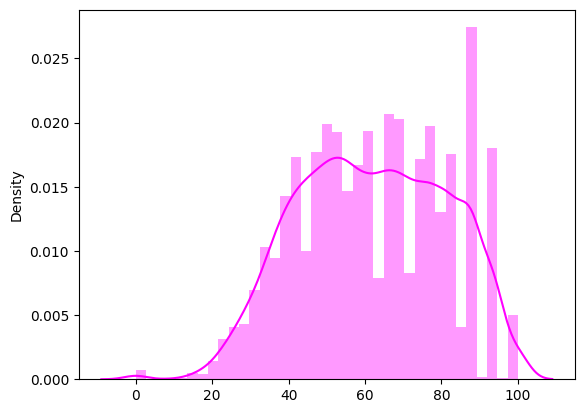

In [15]:
#checking distribution for temperature column
sns.distplot(x=df["humidity"], color='magenta')

<Axes: xlabel='windspeed', ylabel='Count'>

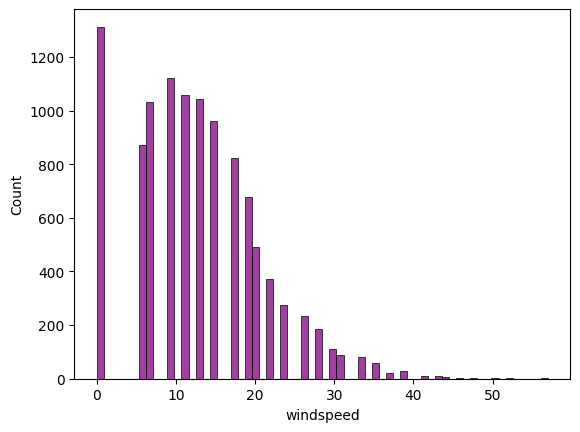

In [16]:
#checking distribution for windspeed column
sns.histplot(x=df["windspeed"], color='purple')

<ipython-input-17-e2a67ff52bb5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["casual"], color='green')


<Axes: ylabel='Density'>

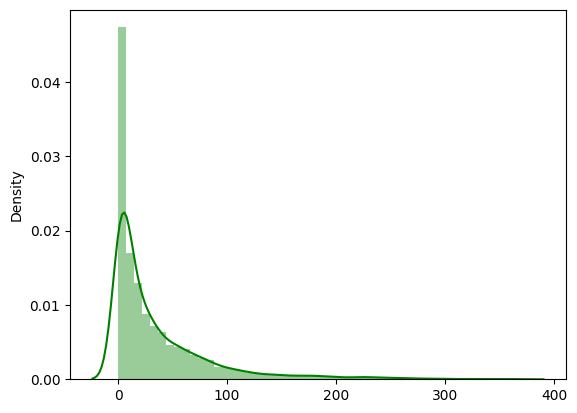

In [17]:
#checking distribution for casual users column
sns.distplot(x=df["casual"], color='green')

<Axes: xlabel='registered', ylabel='Count'>

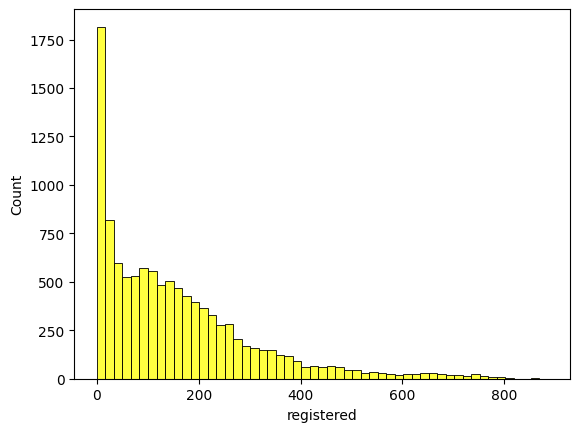

In [18]:
#checking distribution for registered users column
sns.histplot( x=df["registered"], color='yellow')

<ipython-input-19-55843aea56bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["count"], color='red')


<Axes: ylabel='Density'>

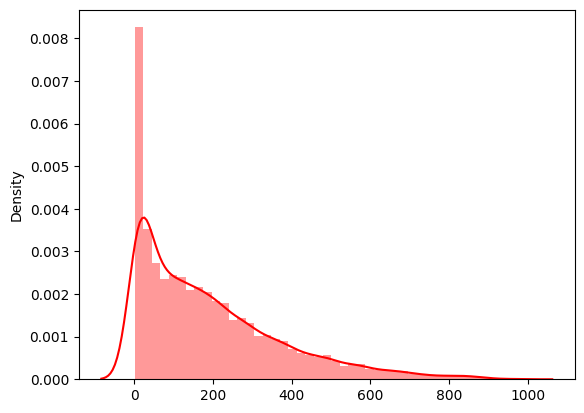

In [19]:
#checking distribution for all users column
sns.distplot(x=df["count"], color='red')

##<font color="red" face="georgia">Analyzing the distribution of Categorical variables

Text(0.5, 1.0, 'Distribution as per working and non-working day')

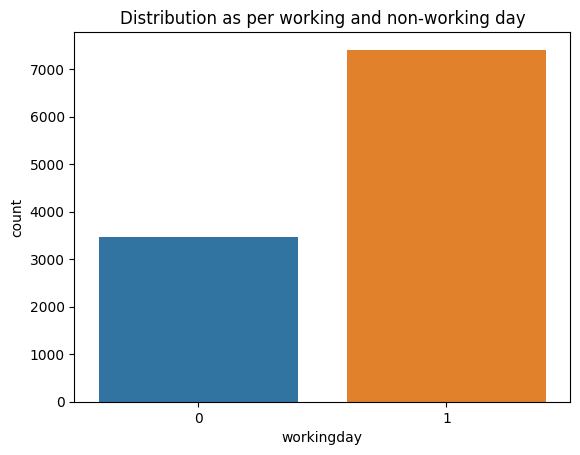

In [20]:
#Checking distribution for working and non-workingday
sns.countplot(x=df["workingday"])
plt.title("Distribution as per working and non-working day")


Text(0.5, 1.0, 'Distribution as per holiday(1) and non-holiday(0)')

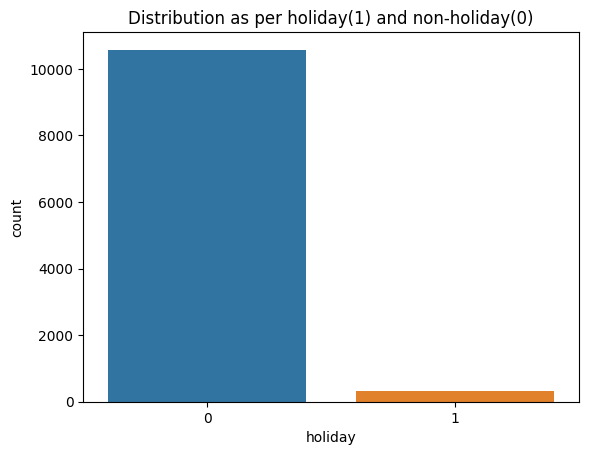

In [21]:
#Checking Distribution as per holiday(1) and non-holiday(0)
sns.countplot(x=df["holiday"])
plt.title("Distribution as per holiday(1) and non-holiday(0)")


##<font color="red" face='georgia'>Bivariate Analysis</font>

In [22]:
#Checking registered users on working day v/s non-working day
df["count"].groupby(by=df["workingday"]).nunique()

workingday
0    629
1    802
Name: count, dtype: int64

<font color='blue'>Hence, People prefer riding Yulu more during working days. As **802** registered users are during workinf days and **629** registered users are during weekend or non-working days.

In [23]:
#Checking number of users in different years
df["count"].groupby(by=pd.to_datetime(df["datetime"]).dt.year).nunique()

datetime
2011    557
2012    813
Name: count, dtype: int64

<font color='blue'>We can conclude that Number of users for Yulu have **increased from year 2011 to year 2012**.

In [24]:
#Checking number of users in different months
df["count"].groupby(by=pd.to_datetime(df["datetime"]).dt.month).nunique()

datetime
1     257
2     292
3     339
4     410
5     450
6     460
7     446
8     437
9     446
10    439
11    417
12    401
Name: count, dtype: int64

<font color='blue'>We can conclude that **maximum** users have preferred Yulu rides during the month of **June**, followed by **May** and then **July**. These seem to be some months where demand is highest. Whereas **minimum users** have used Yulu rides during the month of **January**, followed by **February** and **March**. These seem to be months when demand is low.

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Monthwise Users')]

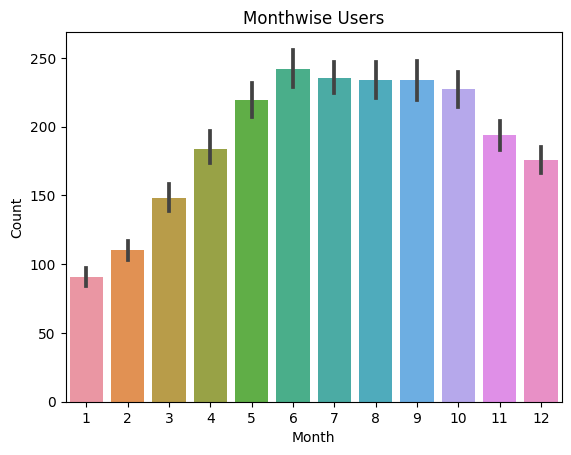

In [81]:
sns.barplot(x=df["Month"],y=df["count"]).set(xlabel="Month",ylabel="Count",title="Monthwise Users")

<font color="blue" > Hence, count of users using Yulu bikes was highest during the month of **June**, followed by **July,August,September & October**. Demand has increased over the years.

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Yearwise Users')]

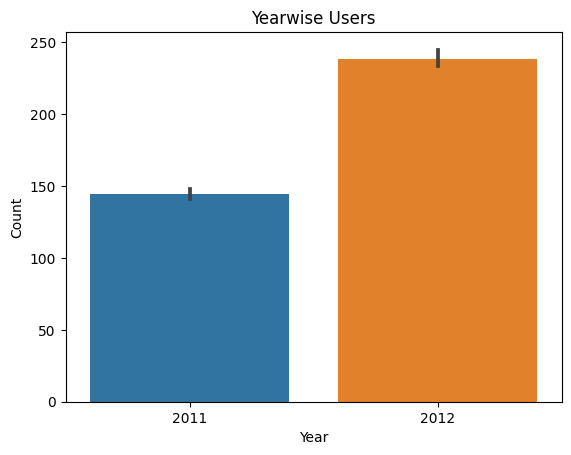

In [82]:
sns.barplot(x=df["Year"],y=df["count"]).set(xlabel="Year",ylabel="Count",title="Yearwise Users")

<font color="blue" >We can conclude that Demand for bikes has increased from **2011 to 2012**.

<Axes: xlabel='season', ylabel='count'>

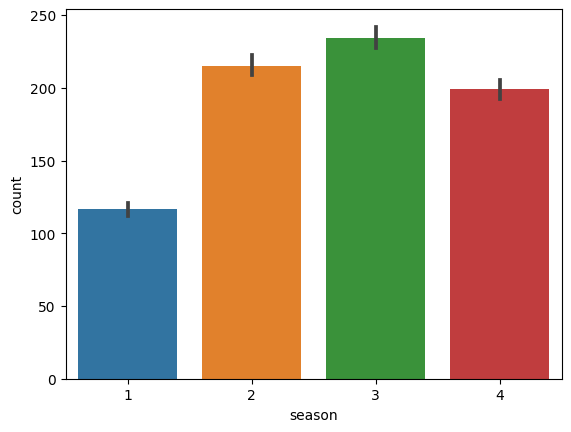

In [26]:
sns.barplot(x=df["season"],y=df["count"])

<font color='blue'>Most demand arises in 3(fall) season followed by 2(summer) and least demand arises ihn 1(spring) season.

<Axes: xlabel='weather', ylabel='count'>

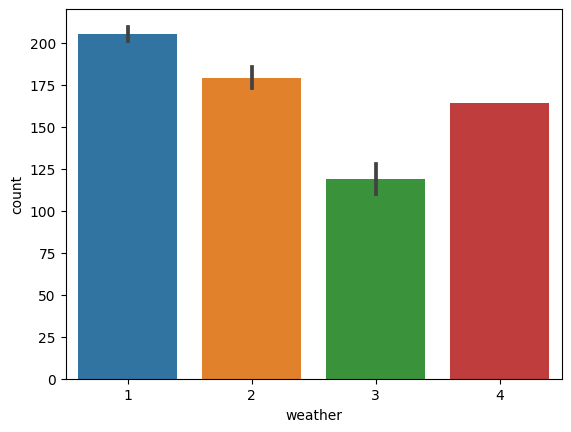

In [27]:
sns.barplot(x=df["weather"],y=df["count"])

<font color='blue'>Mostly people prefer riding yulu in weather type 1 i.e clear sky,Few clouds, partly cloudy. And least likely to ride a yulu in weather type 3 i.e Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

<Axes: xlabel='workingday', ylabel='count'>

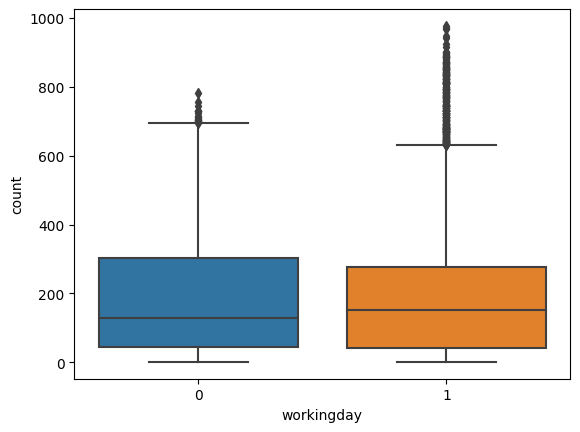

In [28]:
#Checking outliers in workingday
sns.boxplot(x=df["workingday"],y=df["count"])

<font color='blue'> We can observe that median i.e 50th percentile is similar for both working and non-workind days. There are outliers in both cases but outliers in working days are much more than in non-working days.

<Axes: xlabel='season', ylabel='count'>

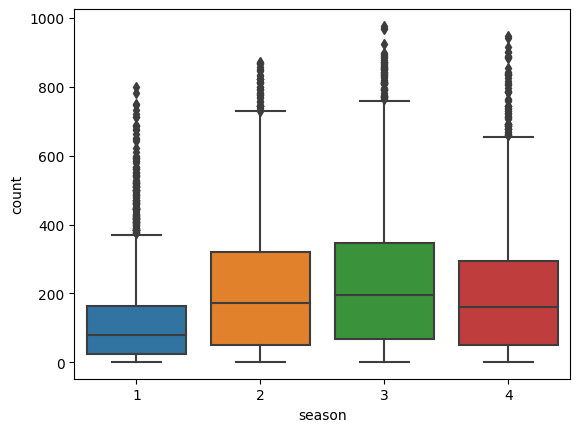

In [29]:
#Checking outliers in seasons
sns.boxplot(x=df["season"],y=df["count"])

<font color='blue'> We can observe that median for season 1 is lower as compared to all other seasons. There are most outliers in season 1 as compared to other seasons.

<Axes: xlabel='Year', ylabel='count'>

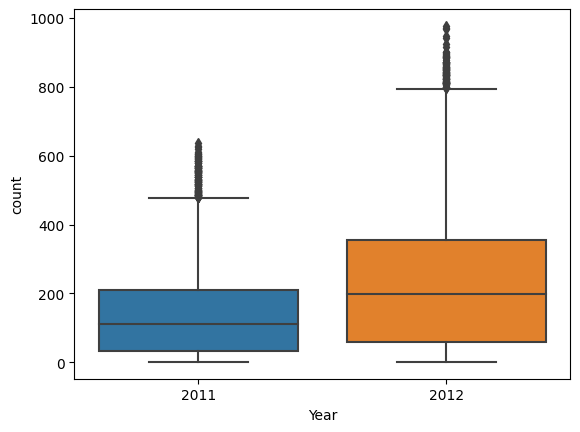

In [30]:
#Checking outliers in Years
sns.boxplot(x=df["Year"],y=df["count"])

<font color='blue'>Hence, Median for 2012 is higher than 2011. Both years data have some outliers.

<ipython-input-84-ac48c1bca1f8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu')


<Axes: >

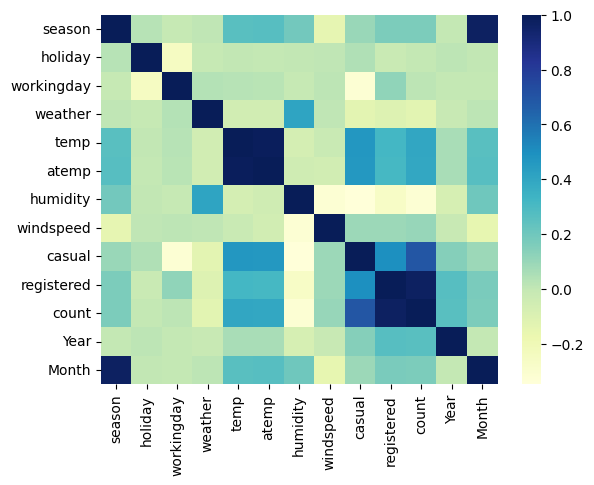

In [84]:
#Heatmap to find Correlation among different columns of the data
df_sample=df.drop('datetime',axis=1)
df_sample1=df_sample.sample(n=1,random_state=42)
sns.heatmap(df.corr(),cmap='YlGnBu')

## <font color='red' face='georgia'>Hypothesis Testing</font>

In [32]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


###<font color="Purple" face="georgia">**Dividing data on the basis of working and non-working day**

In [33]:
working = df[df['workingday'] == 1]["count"]
non_working= df[df["workingday"]==0]["count"]

###<font color="Purple" face="georgia">**Setting up Null & Alternate Hypothesis**</font>

*Ho: There is no significant difference of demand between working and non-working day.*

*Ha: There is difference of demand between working and non-working day.*

Note: We are assuming **significance level to be 0.05**.

##<font color="red" face="georgia"> Checking Assumptions

##<font color="Purple" face="georgia">**Checking Normality Using Histogram**









(array([1464.,  518.,  405.,  373.,  409.,  413.,  414.,  418.,  370.,
         339.,  255.,  302.,  211.,  195.,  147.,  124.,  124.,  116.,
          76.,   88.,   88.,   68.,   50.,   69.,   48.,   33.,   38.,
          27.,   40.,   25.,   25.,   21.,   21.,   19.,   23.,   23.,
          14.,   12.,    2.,    2.,    3.]),
 array([  1.        ,  24.80487805,  48.6097561 ,  72.41463415,
         96.2195122 , 120.02439024, 143.82926829, 167.63414634,
        191.43902439, 215.24390244, 239.04878049, 262.85365854,
        286.65853659, 310.46341463, 334.26829268, 358.07317073,
        381.87804878, 405.68292683, 429.48780488, 453.29268293,
        477.09756098, 500.90243902, 524.70731707, 548.51219512,
        572.31707317, 596.12195122, 619.92682927, 643.73170732,
        667.53658537, 691.34146341, 715.14634146, 738.95121951,
        762.75609756, 786.56097561, 810.36585366, 834.17073171,
        857.97560976, 881.7804878 , 905.58536585, 929.3902439 ,
        953.19512195, 977.     

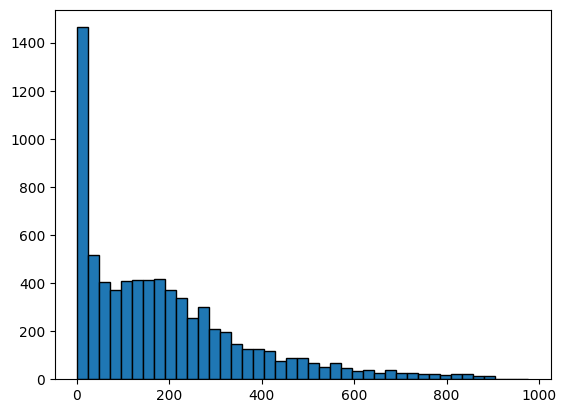

In [34]:
#Checking for Normal distribution of year2011
plt.hist(working,bins="auto",edgecolor="black")

(array([748., 404., 366., 271., 202., 185., 172., 134., 138., 123., 148.,
        119.,  86.,  85.,  77.,  47.,  54.,  31.,  32.,  27.,  17.,   6.,
          2.]),
 array([  1.,  35.,  69., 103., 137., 171., 205., 239., 273., 307., 341.,
        375., 409., 443., 477., 511., 545., 579., 613., 647., 681., 715.,
        749., 783.]),
 <BarContainer object of 23 artists>)

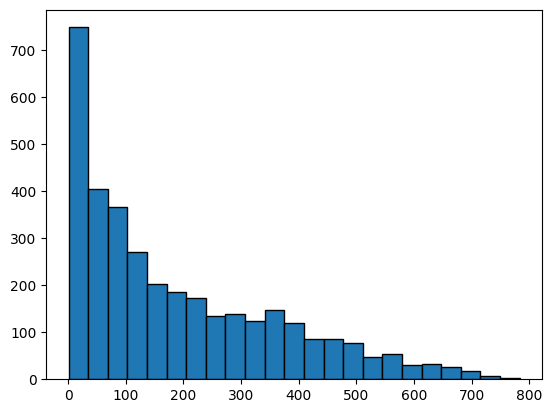

In [35]:
#Checking for Normal distribution of year2012
plt.hist(non_working,bins="auto",edgecolor="black")

<font color="blue" >The curve is not bell shaped for both samples. Hence, the data is not normally distributed.

##<font color="Purple" face="georgia">**Checking Normality Using QQ Plot**

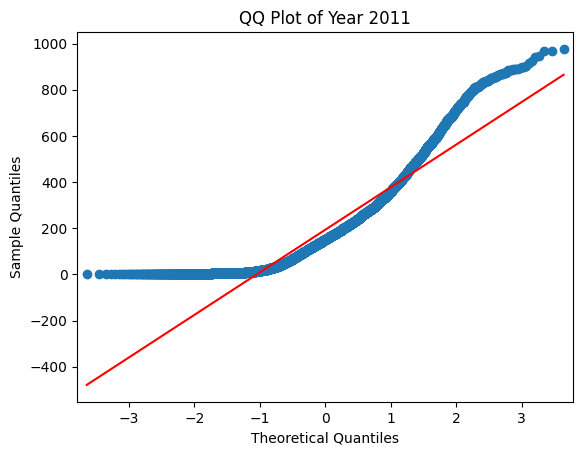

In [36]:
import statsmodels.api as sm
sm.qqplot(working,line='s')
plt.title("QQ Plot of Year 2011")
plt.show()

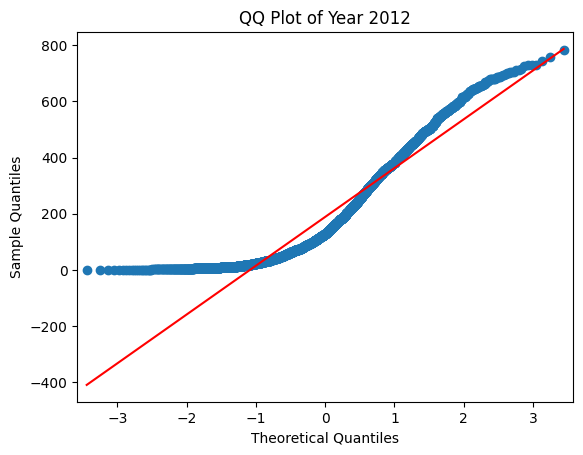

In [37]:
import statsmodels.api as sm
sm.qqplot(non_working,line='s')
plt.title("QQ Plot of Year 2012")
plt.show()

<font color="blue" >The points do not fall along a straight line for both samples, the data is not normally distributed.

##<font color="Purple" face="georgia">**Checking Normality Using Shapiro Wilk Test**

In [38]:
#Checking Normality for year2011 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(working)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
#Checking Normality for year2012 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(non_working)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


<font color="blue" >The Result is that samples for both years are not normally distributed.

##<font color="Purple" face="georgia">**Checking if  Variance is Equal using Levene Test**

In [40]:
from scipy.stats import levene
statistic, pvalue= levene(working,non_working)

if pvalue > 0.05:
  print("Variance is likely Equal")
else:
  print("Variance is likely not Equal")

Variance is likely Equal


###<font color="red" face="georgia">Both the samples are not Normally Distributed. Hence, Assumption of a normally distributed data does not hold true, so we cannot use t_test instead we can use a non-parametric test i.e **Kruskal Walis Test**

In [41]:
from scipy.stats import kruskal
statistic, p_value = kruskal(working,non_working)
if p_value < 0.05:
    print("There is difference of demand between working and non-working day.")
else:
    print("There is no difference of demand between working and non-working day")

There is no difference of demand between working and non-working day


###<font color="red" face="georgia">Using t_test ind

In [42]:
from scipy.stats import ttest_ind
stats,p_value= ttest_ind(working,non_working)

if p_value < 0.05:
    print("There is difference of demand between working and non-working day.")
else:
    print("There is no difference of demand between working and non-working day")

There is no difference of demand between working and non-working day


##<font color="blue" >Hence, we proved that there is no difference of demand between working and non-working day.

###<font color="Purple" face="georgia">**Dividing data on the basis of Seasons**

In [43]:
season1= df[df["season"]==1]["count"]
season2= df[df["season"]==2]["count"]
season3= df[df["season"]==3]["count"]
season4= df[df["season"]==4]["count"]

###<font color="Purple" face="georgia">**Setting up Null & Alternate Hypothesis**</font>

*Ho: There is no significant difference of demand among all 4 seasons.*

*Ha: There is difference of demand among all 4 seasons.*

Note: We are assuming **significance level to be 0.05**.

##<font color="red" face="georgia"> Checking Assumptions

##<font color="Purple" face="georgia">**Checking Normality Using Histogram**


(array([624., 241., 243., 261., 217., 173., 134., 107.,  98.,  78.,  88.,
         72.,  47.,  45.,  40.,  25.,  26.,  19.,  13.,  15.,  17.,   9.,
         14.,  11.,  10.,  14.,   6.,   8.,   5.,   7.,   1.,   1.,   3.,
          3.,   3.,   2.,   2.,   2.,   0.,   2.]),
 array([  1.,  21.,  41.,  61.,  81., 101., 121., 141., 161., 181., 201.,
        221., 241., 261., 281., 301., 321., 341., 361., 381., 401., 421.,
        441., 461., 481., 501., 521., 541., 561., 581., 601., 621., 641.,
        661., 681., 701., 721., 741., 761., 781., 801.]),
 <BarContainer object of 40 artists>)

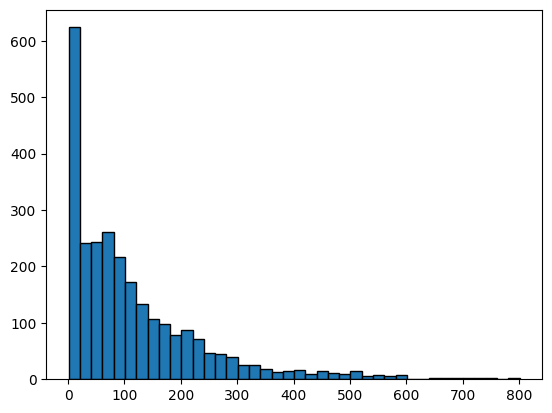

In [44]:
#Checking for Normal distribution for season1
plt.hist(season1,bins="auto",edgecolor="black")

(array([627., 207., 202., 208., 232., 180., 174., 170., 120., 112.,  88.,
         63.,  60.,  53.,  53.,  44.,  39.,  34.,  20.,  17.,  10.,  12.,
          8.]),
 array([  1.        ,  38.91304348,  76.82608696, 114.73913043,
        152.65217391, 190.56521739, 228.47826087, 266.39130435,
        304.30434783, 342.2173913 , 380.13043478, 418.04347826,
        455.95652174, 493.86956522, 531.7826087 , 569.69565217,
        607.60869565, 645.52173913, 683.43478261, 721.34782609,
        759.26086957, 797.17391304, 835.08695652, 873.        ]),
 <BarContainer object of 23 artists>)

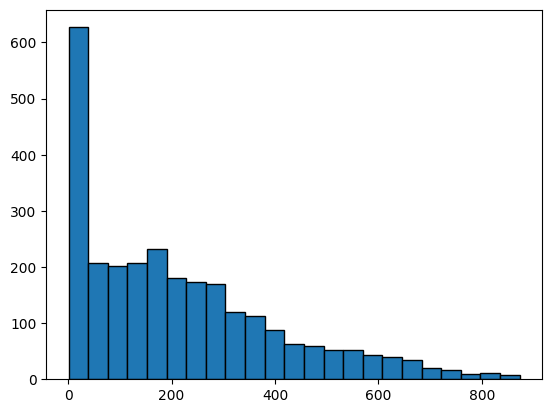

In [45]:
#Checking for Normal distribution for season2
plt.hist(season2,bins="auto",edgecolor="black")

(array([549., 194., 156., 232., 244., 196., 167., 190., 139., 139., 100.,
         76.,  89.,  48.,  54.,  21.,  32.,  25.,  16.,  14.,  16.,  18.,
         14.,   1.,   3.]),
 array([  1.  ,  40.04,  79.08, 118.12, 157.16, 196.2 , 235.24, 274.28,
        313.32, 352.36, 391.4 , 430.44, 469.48, 508.52, 547.56, 586.6 ,
        625.64, 664.68, 703.72, 742.76, 781.8 , 820.84, 859.88, 898.92,
        937.96, 977.  ]),
 <BarContainer object of 25 artists>)

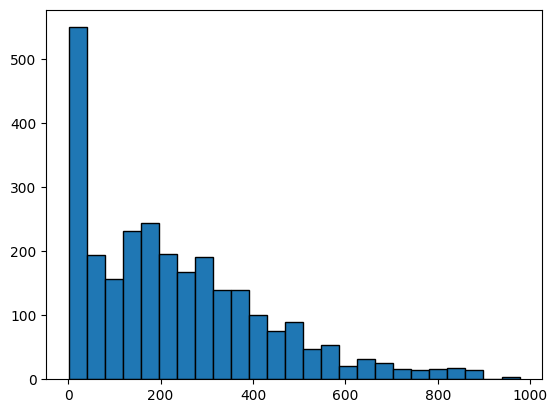

In [46]:
#Checking for Normal distribution for season3
plt.hist(season3,bins="auto",edgecolor="black")

(array([578., 203., 190., 250., 208., 197., 205., 148., 110., 111.,  94.,
         90.,  56.,  71.,  48.,  31.,  28.,  25.,  20.,  13.,  16.,  13.,
          3.,   8.,   8.,   1.,   6.,   3.]),
 array([  1.        ,  34.82142857,  68.64285714, 102.46428571,
        136.28571429, 170.10714286, 203.92857143, 237.75      ,
        271.57142857, 305.39285714, 339.21428571, 373.03571429,
        406.85714286, 440.67857143, 474.5       , 508.32142857,
        542.14285714, 575.96428571, 609.78571429, 643.60714286,
        677.42857143, 711.25      , 745.07142857, 778.89285714,
        812.71428571, 846.53571429, 880.35714286, 914.17857143,
        948.        ]),
 <BarContainer object of 28 artists>)

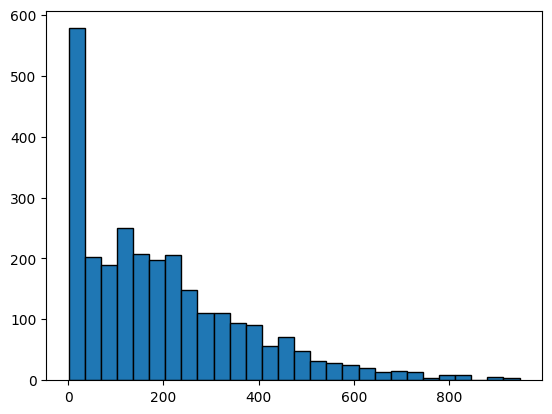

In [47]:
#Checking for Normal distribution for season4
plt.hist(season4,bins="auto",edgecolor="black")

<font color="blue" >The curve is not bell shaped for all the samples. Hence, the data is not normally distributed.

##<font color="Purple" face="georgia">**Checking Normality Using Shapiro Wilk Test**

In [48]:
#Checking Normality for season1 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(season1)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


In [49]:
#Checking Normality for season2 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(season2)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


In [50]:
#Checking Normality for season3 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(season3)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


In [51]:
#Checking Normality for season4 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(season4)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


<font color="blue" >The Result is that samples for all seasons are not normally distributed.

##<font color="Purple" face="georgia">**Checking if  Variance is Equal using Levene Test**

In [52]:
from scipy.stats import levene
statistic, pvalue= levene(season1,season2,season3,season4)

if pvalue > 0.05:
  print("Variance is likely Equal")
else:
  print("Variance is likely not Equal")

Variance is likely not Equal


###<font color="red" face="georgia">All the samples are not Normally Distributed and Variances are not Equal. Hence, Assumption of a normally distributed data does not hold true, so we can use a non-parametric test i.e **Kruskal Walis Test**

In [53]:
from scipy.stats import kruskal
statistic, p_value = kruskal(season1,season2,season3,season4)
if p_value < 0.05:
    print("There is difference of demand among different seasons.")
else:
    print("There is no difference of demand among different seasons")

There is difference of demand among different seasons.


###<font color="red" face="georgia">Using ANNOVA test

In [54]:
from scipy.stats import f_oneway
stats,p_value= f_oneway(season1,season2,season3,season4)

if p_value < 0.05:
    print("There is difference of demand among different seasons.")
else:
    print("There is no difference of demand among different seasons")

There is difference of demand among different seasons.


##<font color="blue">Hence, We proved that there is difference of demand of bikes in different seasons.

###<font color="Purple" face="georgia">**Dividing data on the basis of Weather**

In [55]:
weather1= df[df["weather"]==1]["count"]
weather2= df[df["weather"]==2]["count"]
weather3= df[df["weather"]==3]["count"]
weather4= df[df["weather"]==4]["count"]

###<font color="Purple" face="georgia">**Setting up Null & Alternate Hypothesis**</font>

*Ho: There is no significant difference of demand among all 4 weathers.*

*Ha: There is difference of demand among all 4 weathers.*

Note: We are assuming **significance level to be 0.05**.

##<font color="red" face="georgia"> Checking Assumptions

##<font color="Purple" face="georgia">**Checking Normality Using QQ Plot**

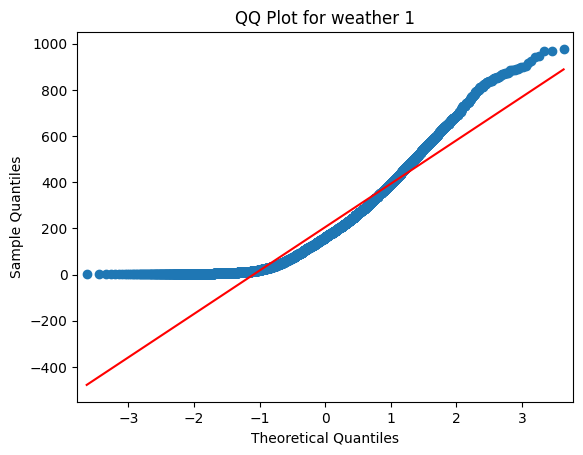

In [56]:
import statsmodels.api as sm
sm.qqplot(weather1,line='s')
plt.title("QQ Plot for weather 1")
plt.show()

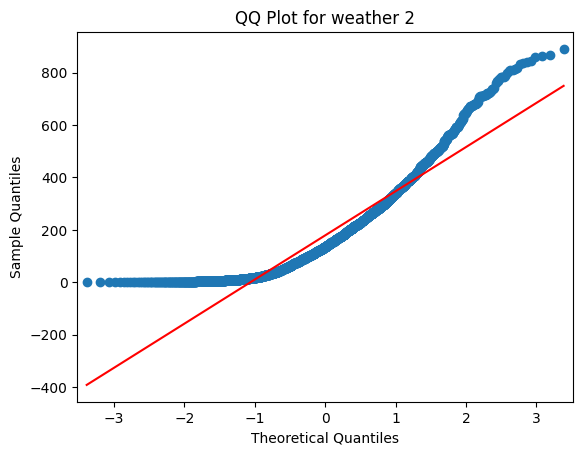

In [57]:
sm.qqplot(weather2,line='s')
plt.title("QQ Plot for weather 2")
plt.show()

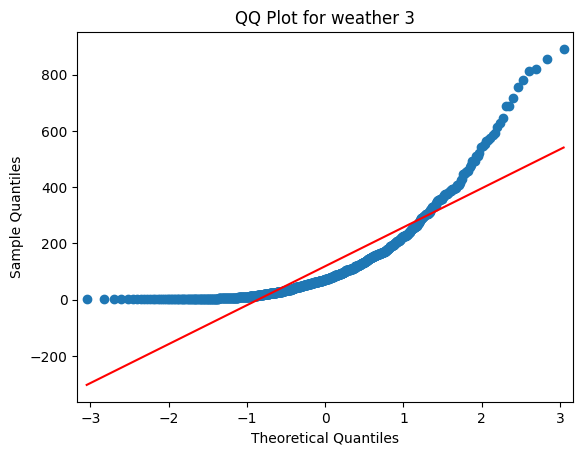

In [58]:
sm.qqplot(weather3,line='s')
plt.title("QQ Plot for weather 3")
plt.show()

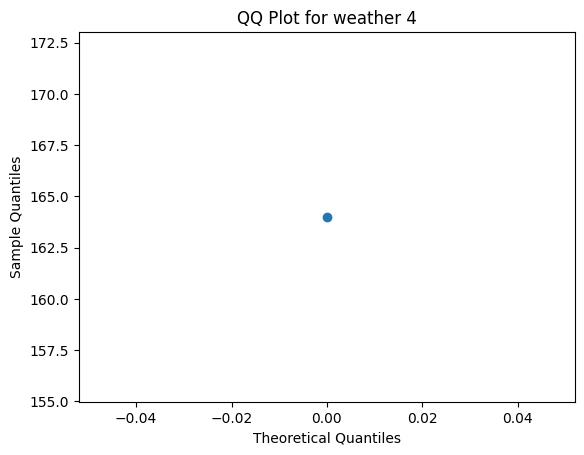

In [59]:
sm.qqplot(weather4,line='s')
plt.title("QQ Plot for weather 4")
plt.show()

<font color="blue">The data points do not fall in a straight line. Hence, data is not normally distributed

##<font color="Purple" face="georgia">**Checking Normality Using Shapiro Wilk Test**

In [60]:
#Checking Normality for weather1 by using Statistical tests
from scipy.stats import shapiro
statistic, pvalue= shapiro(weather1)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


In [61]:
#Checking Normality for weather2 by using Statistical tests
statistic, pvalue= shapiro(weather2)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


In [62]:
#Checking Normality for weather3 by using Statistical tests
statistic, pvalue= shapiro(weather3)

if pvalue > 0.05:
  print("Sample is likely Normally Distributed")
else:
  print("Sample is likely not Normally Distributed")

Sample is likely not Normally Distributed


##<font color="Purple" face="georgia">**Checking if  Variance is Equal using Levene Test**

In [63]:
from scipy.stats import levene
stats,p_value= levene(weather1,weather2,weather3,weather4)

if p_value>0.05:
  print("Variance is likely Equal")
else:
  print("Variance is likely not Equal")

Variance is likely not Equal


###<font color="red" face="georgia">All the samples are not Normally Distributed and Variances are not Equal. Hence, Assumption of a normally distributed data does not hold true, so we can use a non-parametric test i.e **Kruskal Walis Test**

In [64]:
from scipy.stats import kruskal
stats,p_value= kruskal(weather1,weather2,weather3,weather4)

if p_value<0.05:
  print("There is difference in demand of bike in different weathers")
else:
  print("There is no difference in demand of bike in different weathers")

There is difference in demand of bike in different weathers


###<font color="red" face="georgia">Using ANNOVA test

In [65]:
stats,p_value=f_oneway(weather1,weather2,weather3,weather4)

if p_value<0.05:
  print("There is difference in demand of bike in different weathers")
else:
  print("There is no difference in demand of bike in different weathers")

There is difference in demand of bike in different weathers


##<font color="blue"> Hence, we proved that there is difference of demand of bike in different weathers.

##<font color="Purple" face="georgia"> **Checking if Weather is dependent on the Season**

###<font color="Purple" face="georgia">**Setting up Null & Alternate Hypothesis**</font>

*Ho: Weather conditions are same during different Seasons.*

*Ha: Weather conditions are significantly different during different Seasons.*

Note: We are assuming **significance level to be 0.05**.

##<font color="red" face="georgia">Making a Contingency table

In [66]:
#Creating contingency table for weather and season
contingency_table= pd.crosstab(df["weather"],df["season"])

print(contingency_table)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


##<font color="red" face="georgia">Using Chi-square test

In [67]:
from scipy.stats import chi2_contingency

chi2,pvalue,dof,expected= chi2_contingency(contingency_table)

if pvalue<0.05:
  print("Reject the null hypothesis: Weather and Season are dependent")
else:
  print("Faiul to Reject the null hypothesis: Weather and Season are independent")

Reject the null hypothesis: Weather and Season are dependent


##<font color="blue">Hence, We reject the Null Hypothesis that Weather and Season are not related.

#<font color="red" face="georgia">**Insights**

1. ***Significant Variables*** are **Seasons** as we have observed differences in demand across different seasons, **Weather** as demand varies based on different weather conditions, **Month** as demand fluctuates throughout the year with specific months showing higher or lower demand & **Year** as the number of users has increased from 2011 to 2012.

2. The increase in the number of users from **2011** to **2012** indicates a positive trend.This positive trend indicates potential for continued growth

3.  Correlation between weather conditions, seasons, and demand suggests predictability.

4. There is a difference in demand across different seasons, with the **fall season** showing the highest demand and **spring season** the least.

5. Demand varies based on weather conditions, with the highest demand observed in clear sky conditions **(Weather Type 1**) and the least demand in light snow, light rain, or thunderstorm conditions (**Weather Type 3**).

6.  Specific months, such as **June, May, and July**, exhibit higher demand, while January, February, and March show lower demand.

7. There is a difference in demand between **working days** and **non-working days**, with more registered users during working days.


#<font color="red" face="georgia">**Recommendations**

1. Focus marketing efforts during peak demand months (June, May, July) to capitalize on high demand periods. By strategically allocating marketing budgets to peak months, YULU can maximize user acquisition and brand visibility when demand is naturally higher.

2. Offer promotions or incentives during clear sky weather conditions (Weather Type 1) to encourage more ridership. Promotions with favorable weather conditions can boost ridership and enhance the overall user experience.

3. Introduce seasonal promotions or discounts to boost demand during seasons with lower utilization.  Providing incentives during off-peak seasons can help smooth demand fluctuations and encourage usage during periods of lower natural demand.

4.  Since there is a difference in demand between working and non-working days, consider special promotions or expanded services on weekends to attract more users.

5. Analyze yearly trends and plan for increased demand in subsequent years. Consider expanding operations or introducing new features to accommodate growing user numbers.

6. Advance planning based on yearly trends ensures YULU is well-prepared for future growth, allowing for strategic decisions on fleet expansion, infrastructure development and service enhancements.